In [55]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [46]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_date = '2017_11_17'
exp_name = '2017_11_17_10_38_57_background'
experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)

In [47]:
q.experiments[0]['variable_list']

[]

In [52]:
sig_data = q.experiments[0]['iterations'][0]['signal_data']
shots = len(sig_data[0])
max_sig = np.max(sig_data.astype('int32').flatten())
binned_data = np.zeros((shots, max_sig+1))
bins = range(max_sig+2)
for s in range(shots):
    binned_data[s] = np.histogram(sig_data[:, s], bins=bins, normed=True)[0]
    
means = np.mean(sig_data, axis=0)

<IPython.core.display.Javascript object>


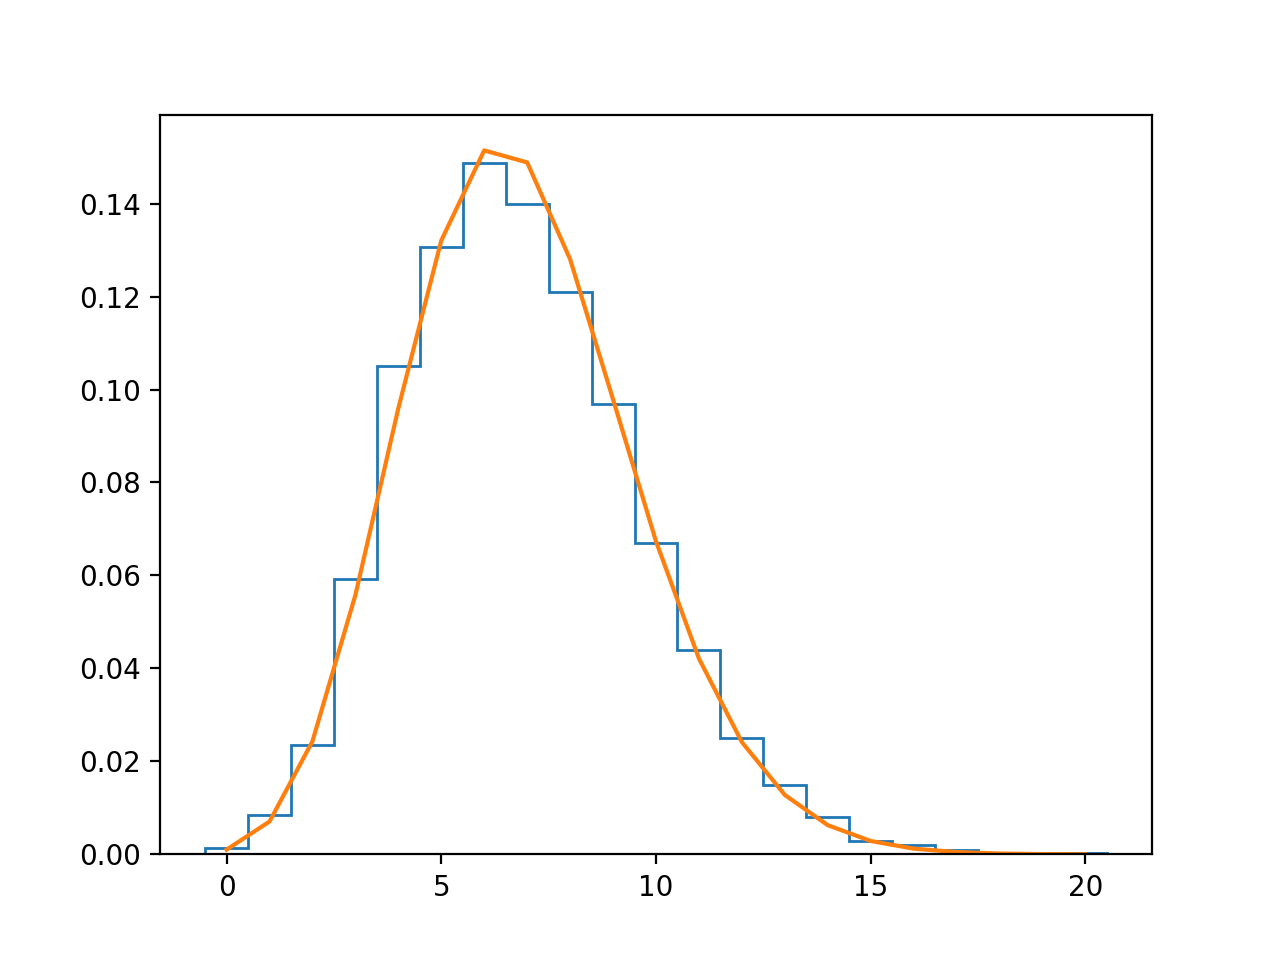

In [67]:
s=0
fig, ax = plt.subplots()
ax.hist(sig_data[:,s], bins=bins, normed=True, align='left', histtype='step')
xs = np.arange(max(bins))
ax.plot(xs, poisson.pmf(xs, means[s]))

<IPython.core.display.Javascript object>


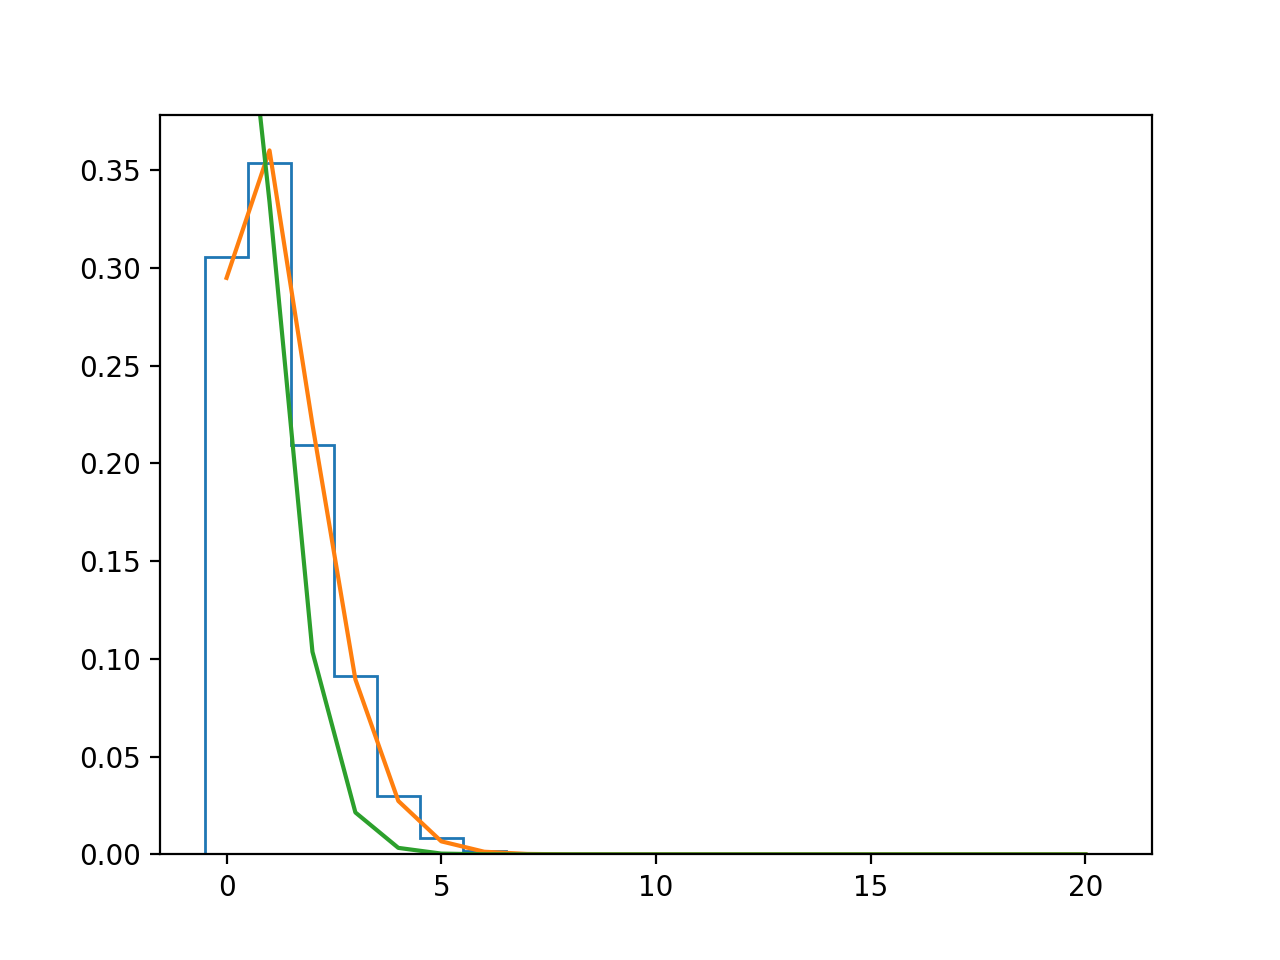

(0, 0.37811086115890896)

In [83]:
s=1
fig, ax = plt.subplots()
ax.hist(sig_data[:,s], bins=bins, normed=True, align='left', histtype='step')
xs = np.arange(max(bins))
ax.plot(xs, poisson.pmf(xs, means[s]))  # 250 cps SPCM background
ax.plot(xs, poisson.pmf(xs, means[s]-0.2*3))  # 50 cps SPCM background
#ax.plot(xs, 1-poisson.cdf(xs-1, means[s]))
#ax.plot(xs, 1-poisson.cdf(xs-1, means[s]-0.2*3))
ax.set_ylim(0, 1.05*np.max(poisson.pmf(xs, means[s])))

In [79]:
means/3.0

array([ 2.29354129,  0.40705192])